In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Serie de Fourier para peak
$$
f[x] = \sum_{k=0}^\infty a_k \cos[k \frac{2\pi}{T} x] + b_k \sin[k\frac{2\pi}{T}x]
$$
donde $T$ es el periodo de la onda

In [8]:
# definimos la funcion creando un domain
N = 1000
limits = [-5, 5] 


T = limits[1] - limits[0] #periodo de la onda

dx = T/N
x = np.linspace(limits[0], limits[1] + dx , N)


print("x:",x[:5], '...')

# N = len(x)
print("using N:",N)

# el periodo seria
# T = x[-1] - x[0]
print("T:", T)

x: [-5.         -4.98997998 -4.97995996 -4.96993994 -4.95991992] ...
using N: 1000
T: 10


N/4: 250


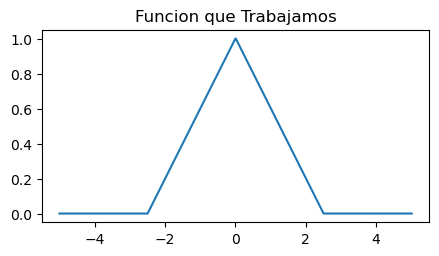

In [9]:
# deyninir la funcion / Ingresar datos
Nquart = int(np.floor(N/4))
print("N/4:", Nquart)

yn= np.zeros_like(x) #crea un arreglo identico a x pero con zeros
# f[:Nquart] = 0 # el primer cuarto tiene 0's y el ultimo
f[Nquart:2*Nquart] = np.linspace(0,1,Nquart)
f[2*Nquart:3*Nquart] = np.linspace(1,0,Nquart)


# ------------
fig, ax = plt.subplots(figsize=(5,2.5))
plt.title('Funcion que Trabajamos')
plt.plot(x,f)
plt.show()

## calcular la serie de Fourier
el producto interno usado para calcular coeficientes es $k \neq 0$,
$$
a_k =\frac{2}{T} \int_{t_0}^{t_0+T} f[x) \cos[\omega k x) dx
$$

para el caso $k=0$
$$
a_0 = \frac{1}{T} \int_{t_0}^{t_0+T} f[x) dx
$$

por tanto habremos de dividir por 2 en ese caso para hacer calzar los temas

donde $\omega = \frac{2\pi}{T}$

de donde viene el termino externo?
$$

$$

### la integral es discretizable a:
Vease el notebook adjunto `regla_trapezoidal.ipynb`
$$
\braket{f[x), \cos[\omega k x)} = \sum_{i=0}^{M} f_i \cdot \cos[\omega k x_i) \cdot dx
$$

donde $M$ es la cantidad de puntos que elegimos, puede estar $M \in ]0, N-1]$

In [10]:
omega = 2 * np.pi / T

In [11]:
# prodcto interno con algun coseno y la suma
# prueba k =0, k=1, k=4
# e interpreta los resultados
k = 1
# suma de riemman
np.sum(
    yn* np.cos(omega * k * x) *  dx
)


2.0264202055616027

los coeficientes a calcular se guardan como un arreglo
$$ a_k = a[k]$$
podemos elegir un $M$ cualquiera, a mayor $M$ mas precision y mas calculos, desde cierto punto tendras una frecuencia: $\omega k $ bastante alta que se encargara de los detalles asi como de capturar ruido en el caso de que trabajes con data real

In [15]:
M = 30
a = np.zeros(M)
b = np.zeros(M)

for k in range(0,M):
    a[k] = (2/T) * np.sum( yn * np.cos(omega * k * x) *  dx )
    b[k] = (2/T) * np.sum( yn * np.sin(omega * k * x) *  dx )

a[0] = a[0] / 2 # el primer componene a_0 lleva 

print("a[k]:",a)

a[k]: [ 2.50000000e-01  4.05284041e-01  2.02640662e-01  4.50297538e-02
 -2.00795117e-06  1.62085952e-02  2.25126685e-02  8.26869620e-03
 -2.00771427e-06  5.00074463e-03  8.10242904e-03  3.34693428e-03
 -2.00731935e-06  2.39538683e-03  4.13226106e-03  1.79869610e-03
 -2.00676629e-06  1.39963703e-03  2.49844710e-03  1.12008003e-03
 -2.00605491e-06  9.16291525e-04  1.67141320e-03  7.63527255e-04
 -2.00518499e-06  6.45742130e-04  1.19574640e-03  5.53330302e-04
 -2.00415624e-06  4.79200955e-04]


## rearmando la funcion
$$
f[x] = \sum_{k=0}^\infty a_k \cos[k \frac{2\pi}{T} x] + b_k \sin[k\frac{2\pi}{T}x]
$$

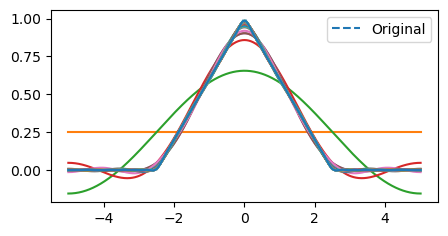

In [16]:
yn= np.zeros_like(x)

fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, f, '--',label='Original')

for k in range(M):
    F += a[k] * np.cos( k * omega * x) + b[k] * np.sin( k * omega * x)
    plt.plot(x, F)

plt.legend()
plt.show()

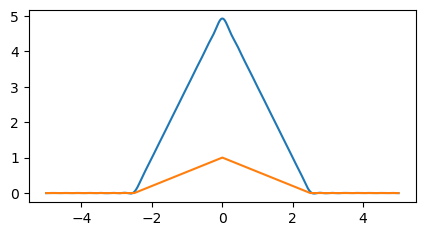

In [14]:
# probando el plot final
fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, F, label='Fourier')
plt.plot(x, f, label='Original')
plt.show()

# PlayGround

N/4: 250
N/4: 250


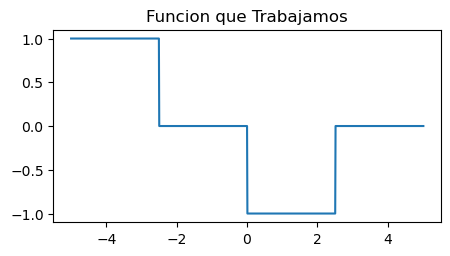

In [1]:
# definimos la funcion creando un domain
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# definimos la funcion creando un domain
N = 1000
limits = [-5, 5] 
T = limits[1] - limits[0] #periodo de la onda

dx = T/N
x = np.linspace(limits[0], limits[1] + dx , N)


#del periodo viene omega que resume la informacion frecuencial
omega = 2 * np.pi / T

# definir la funcion / Ingresar datos
Nquart = int(np.floor(N/4))
print("N/4:", Nquart)

# definir la funcion / Ingresar datos
Nquart = int(np.floor(N/4))
print("N/4:", Nquart)

yn = np.zeros_like(x) #crea un arreglo identico a x pero con zeros
yn[:Nquart] = 1
yn[Nquart:2*Nquart] = 0
yn[2*Nquart:3*Nquart] = -1
yn[3*Nquart:] = 0


# ------------
fig, ax = plt.subplots(figsize=(5,2.5))
plt.title('Funcion que Trabajamos')
plt.plot(x,yn)
plt.show()

a[k]: [ 0.00000000e+00 -6.35344575e-01  3.99596461e-03  2.11764921e-01
  1.57753689e-07 -1.27045422e-01  3.99564953e-03  9.07253851e-02
  6.30989944e-07 -7.05491578e-02  3.99501942e-03  5.76994057e-02
  1.41963434e-06 -4.88069712e-02  3.99407438e-03  4.22761484e-02
  2.52356283e-06 -3.72865835e-02  3.99281455e-03  3.33381168e-02
  3.94260179e-06 -3.01469792e-02  3.99124015e-03  2.75017280e-02
  5.67652805e-06 -2.52853956e-02  3.98935141e-03  2.33884879e-02
  7.72506890e-06 -2.17592174e-02]


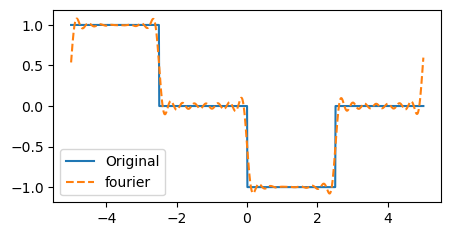

In [8]:
#  resolviendo con regla trapezoidal
M = 30
a = np.zeros(M)
b = np.zeros(M)

for k in range(0,M):
    a[k] = (2/T) * np.sum( yn* np.cos(omega * k * x) *  dx )
    b[k] = (2/T) * np.sum( yn* np.sin(omega * k * x) *  dx )

a[0] = a[0] / 2 # el primer componene a_0 lleva 

print("a[k]:",a)


# se realiza el plot con los coeficinetes
F = np.zeros_like(x)

fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, yn,label='Original')

for k in range(M):
    F += a[k] * np.cos( k * omega * x) + b[k] * np.sin( k * omega * x)

plt.plot(x, F, '--', label="fourier")
#    if k%3 ==0:
#        plt.savefig(f'plots/{k}.png')

plt.legend()
plt.show()